<a href="https://colab.research.google.com/github/Shrikant52kule/BDA/blob/main/Movie%20Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:

movie = pd.read_csv("IMDb Movies India.csv", encoding="windows-1252")
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
movie.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:

movie.shape

(15509, 10)

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
movie.describe()


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


<Axes: >

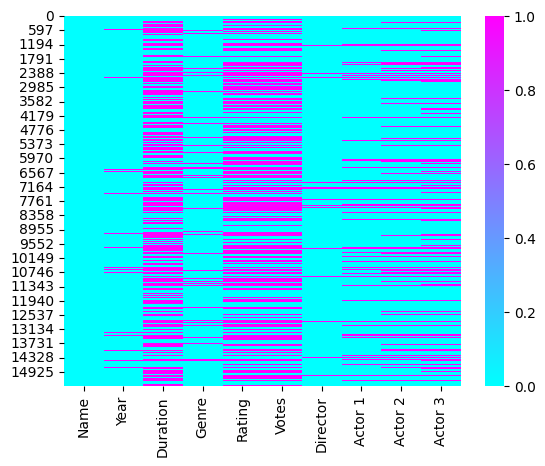

In [9]:
sns.heatmap(movie.isnull(),cbar=True,cmap='cool')

In [10]:
print(f"Duration :\n {movie['Duration'].value_counts()}")


Duration :
 Duration
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
201 min      1
206 min      1
198 min      1
218 min      1
250 min      1
Name: count, Length: 182, dtype: int64


In [11]:
print(f"Years :\n {movie['Year'].value_counts()}")


Years :
 Year
(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: count, Length: 102, dtype: int64


In [12]:
print(f"Genre :\n {movie['Genre'].value_counts()}")


Genre :
 Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64


In [13]:
print(f"Unique values:\n {movie.nunique()}")


Unique values:
 Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


In [14]:
movie.dropna(subset = ['Name','Year','Duration','Genre','Rating','Votes','Director'],inplace = True)



In [15]:
movie.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [16]:

sns.set_style('darkgrid')
sns.set_palette('Dark2')

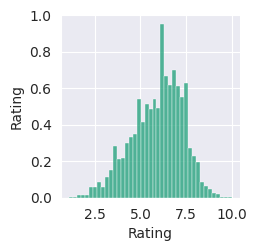

In [17]:

sns.pairplot(data = movie)

<Axes: xlabel='Rating', ylabel='Votes'>

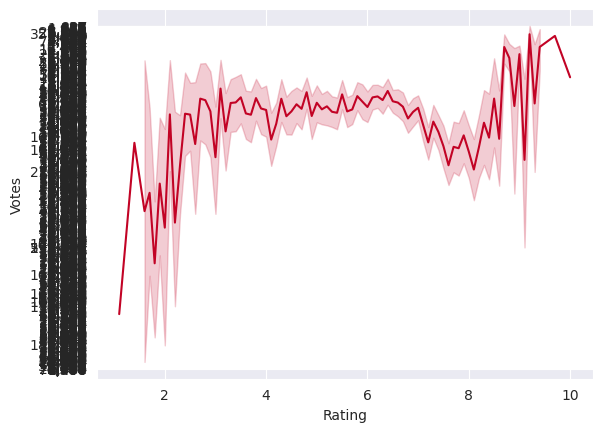

In [18]:
sns.set_palette('YlOrRd_r')
sns.lineplot(data=movie, x="Rating", y="Votes")

<Axes: xlabel='Rating', ylabel='Count'>

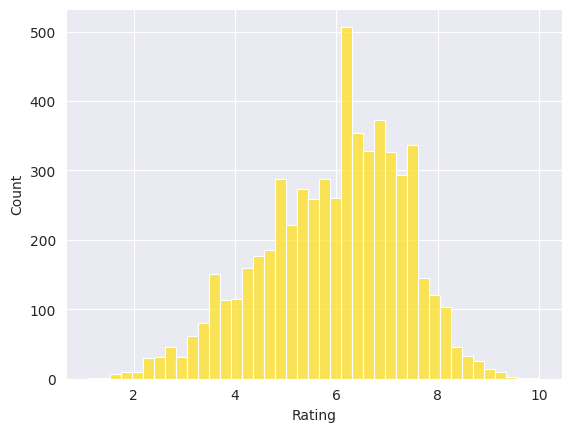

In [19]:
sns.set_palette('gnuplot2_r')
sns.histplot(x="Rating",data = movie)

Text(0.5, 0, 'Votes')

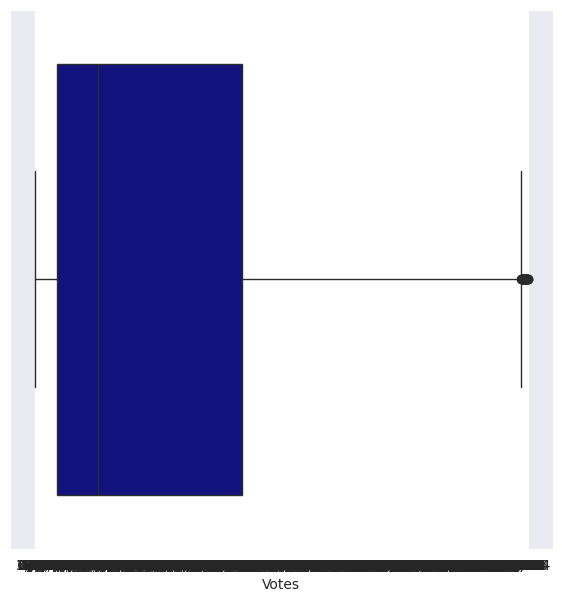

In [24]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Votes',data=movie)
plt.xlabel('Votes')

TRAIN A MODEL


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X = movie.drop('Rating',axis = 1)
y = movie['Rating']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [30]:
scaler = StandardScaler()
